In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_excel('База для ЛЭТИ.xlsx')

# Обработка

In [3]:
df.head(5)

,N,Дата операции,"Тип операции (1 - ПРЖ, 2 - ГШ, 3 - ВЖБ, 4 - MGB-OAGB)",Возраст на момент операции,Возраст на момент повторного приема,Препараты,Заболевания,"НМЦ до 0 - нет, 1 - есть, 4 - менопауза, 5 - коки (без деления по структуре)","НМЦ после 0 - нет, 1 - есть, 4 - менопауза, 5 - коки (без деления по структуре)","НМЦ ДО 0 - норма, 1 - аменорея, 2 - олигоменорея, 3 - амк, 4 - менопауза, 5 - коки",...,Unnamed: 384,"FSFI: Удовлетворение (из 6,0)",Unnamed: 386,Unnamed: 387,"FSFI: Боль (из 6,0) (6,0 - никогда)",Unnamed: 389,Unnamed: 390,"FSFI: сумма (из 36,0)",Unnamed: 392,Unnamed: 393
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,>12,До БО,Через 1-12 мес,>12,До БО,Через 1-12 мес,>12,До БО,Через 1-12 мес,>12
1,NaN,2016-03-28 00:00:00,2,37.0,45.0,NaN,NaN,0.0,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,2016-12-05 00:00:00,1,24.0,31.0,NaN,Синдром Прадера-Вилли,1.0,NaN,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,2016-03-29 00:00:00,2,43.0,51.0,NaN,"гб, аит, камни желчного пузыря",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,2017-09-07 00:00:00,1,38.0,44.0,NaN,"Повторный набор веса! Миома матки (АМК), гипер...",0.0,1.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.iloc[0, 136] = 'Через 1-12 мес'

/tmp/ipykernel_8458/1724707377.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Через 1-12 мес' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  df.iloc[0, 136] = 'Через 1-12 мес'


### Заменим NaN на пропуски и описание времени добавим в название столбца

In [5]:
for i in range(len(df.columns)):
    if type(df.iloc[0, i]) != str:
        df.iloc[0, i] = ''

/tmp/ipykernel_8458/2331151346.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.iloc[0, i] = ''


In [6]:
for i, column in enumerate(df.columns):
    if 'Unnamed' in column:
        df = df.rename(columns={column: last_column + ' ' + df.iloc[0, i]})
    else:
        last_column = column
        df = df.rename(columns={column: last_column + ' ' + df.iloc[0, i]})

In [7]:
df.head(5)

,N,Дата операции,"Тип операции (1 - ПРЖ, 2 - ГШ, 3 - ВЖБ, 4 - MGB-OAGB)",Возраст на момент операции,Возраст на момент повторного приема,Препараты,Заболевания,"НМЦ до 0 - нет, 1 - есть, 4 - менопауза, 5 - коки (без деления по структуре)","НМЦ после 0 - нет, 1 - есть, 4 - менопауза, 5 - коки (без деления по структуре)","НМЦ ДО 0 - норма, 1 - аменорея, 2 - олигоменорея, 3 - амк, 4 - менопауза, 5 - коки",...,"FSFI: Оргазм (из 6,0) >12","FSFI: Удовлетворение (из 6,0) До БО","FSFI: Удовлетворение (из 6,0) Через 1-12 мес","FSFI: Удовлетворение (из 6,0) >12","FSFI: Боль (из 6,0) (6,0 - никогда) До БО","FSFI: Боль (из 6,0) (6,0 - никогда) Через 1-12 мес","FSFI: Боль (из 6,0) (6,0 - никогда) >12","FSFI: сумма (из 36,0) До БО","FSFI: сумма (из 36,0) Через 1-12 мес","FSFI: сумма (из 36,0) >12"
0,,,,,,,,,,,...,>12,До БО,Через 1-12 мес,>12,До БО,Через 1-12 мес,>12,До БО,Через 1-12 мес,>12
1,NaN,2016-03-28 00:00:00,2,37.0,45.0,NaN,NaN,0.0,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,2016-12-05 00:00:00,1,24.0,31.0,NaN,Синдром Прадера-Вилли,1.0,NaN,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,2016-03-29 00:00:00,2,43.0,51.0,NaN,"гб, аит, камни желчного пузыря",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,2017-09-07 00:00:00,1,38.0,44.0,NaN,"Повторный набор веса! Миома матки (АМК), гипер...",0.0,1.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# Удалим нулевую строку
df = df[1:]

In [9]:
df.index = [i for i in range(len(df))]

# Нарушения менструального цикла

### Посмотрим в каких строках непустые ячейки у столбцов НМЦ

In [10]:
df.iloc[:, 8]

0           NaN
1           NaN
2           NaN
3           1.0
4           NaN
         ...   
165    0.023529
166    0.023529
167         NaN
168         NaN
169         NaN
Name: НМЦ после 0 - нет, 1 - есть, 4 - менопауза, 5 - коки (без деления по структуре) , Length: 170, dtype: object

In [11]:
not_empty_rows = []
for i, elem in enumerate(df.iloc[0:149, 8]):
    if not np.isnan(elem):
        not_empty_rows.append(i)

In [12]:
len(not_empty_rows)

73

### Достанем все столбцы, в строках not_empty_rows которых больше 50% непустых значений

In [13]:
not_empty_columns = []
for column in df.columns:
    try:
        count = 0
        for elem in df[column][not_empty_rows]:
            if np.isnan(elem) == False:
                count += 1
        
        if count/len(not_empty_rows) > 0.5:
            not_empty_columns.append(column)
    except:
        pass

In [14]:
len(not_empty_columns)

36

In [15]:
not_empty_rows

[3,
 6,
 10,
 12,
 15,
 17,
 18,
 19,
 20,
 21,
 22,
 24,
 32,
 47,
 65,
 70,
 73,
 74,
 77,
 78,
 80,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 139,
 140,
 141,
 142,
 146,
 147]

In [16]:
df

,N,Дата операции,"Тип операции (1 - ПРЖ, 2 - ГШ, 3 - ВЖБ, 4 - MGB-OAGB)",Возраст на момент операции,Возраст на момент повторного приема,Препараты,Заболевания,"НМЦ до 0 - нет, 1 - есть, 4 - менопауза, 5 - коки (без деления по структуре)","НМЦ после 0 - нет, 1 - есть, 4 - менопауза, 5 - коки (без деления по структуре)","НМЦ ДО 0 - норма, 1 - аменорея, 2 - олигоменорея, 3 - амк, 4 - менопауза, 5 - коки",...,"FSFI: Оргазм (из 6,0) >12","FSFI: Удовлетворение (из 6,0) До БО","FSFI: Удовлетворение (из 6,0) Через 1-12 мес","FSFI: Удовлетворение (из 6,0) >12","FSFI: Боль (из 6,0) (6,0 - никогда) До БО","FSFI: Боль (из 6,0) (6,0 - никогда) Через 1-12 мес","FSFI: Боль (из 6,0) (6,0 - никогда) >12","FSFI: сумма (из 36,0) До БО","FSFI: сумма (из 36,0) Через 1-12 мес","FSFI: сумма (из 36,0) >12"
0,NaN,2016-03-28 00:00:00,2,37.0,45.0,NaN,NaN,0.0,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,2016-12-05 00:00:00,1,24.0,31.0,NaN,Синдром Прадера-Вилли,1.0,NaN,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,2016-03-29 00:00:00,2,43.0,51.0,NaN,"гб, аит, камни желчного пузыря",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,2017-09-07 00:00:00,1,38.0,44.0,NaN,"Повторный набор веса! Миома матки (АМК), гипер...",0.0,1.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,2017-10-03 00:00:00,1,34.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,NaN,NaN,0.030534,NaN,NaN,NaN,NaN,0.023529,0.023529,0.344828,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
166,NaN,NaN,0.030534,NaN,NaN,NaN,NaN,0.0,0.023529,0.448276,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.206897,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
df_nmc = df.loc[0:149:, not_empty_columns]
df_nmc = df_nmc.iloc[not_empty_rows]

### Удалим лишние столбцы

In [18]:
for i, column in enumerate(df_nmc.columns):
    print(i, column)

0 Тип операции (1 - ПРЖ, 2 - ГШ, 3 - ВЖБ, 4 - MGB-OAGB) 
1 Возраст на момент операции 
2 НМЦ до 0 - нет, 1 - есть, 4 - менопауза, 5 - коки (без деления по структуре) 
3 НМЦ после 0 - нет, 1 - есть, 4 - менопауза, 5 - коки (без деления по структуре) 
4 НМЦ ДО  0 - норма, 1 - аменорея, 2 - олигоменорея, 3 - амк, 4 - менопауза, 5 - коки 
5 НМЦ ПОСЛЕ 0 - норма, 1 - аменорея, 2 - олигоменорея, 3 - амк, 4 - менопауза, 5 - КОКи 
6 Беременности 
7 Количество беременностей, закончившихся родами до БО 
8 Прерывание беременности по тем или иным причинам 
9 Курение 0 - нет, 1 - да 
10 Наследственность по ранней менопаузе (до 45 лет) 0 - нет, 1 - да 
11 Сколько раз худела >10% (экстремальное похудение) 
12 Длительность ожирения до операции 
13 Были ли операции на яичниках 0 нет 1 да 
14 Соблюдение рекомендаций после БО 0 -нет, 1- да 
15 Рост, м 
16 Вес на момент операции 
17 ИМТ на момент операции 
18 ИМТ ПОСЛЕ БО Через 12-24 (до 2 лет)
19 Глик гем, % (<6) До БО
20 Глюкоза, ммоль/л (N до 6,1; МС>5,

In [19]:
df_nmc = df_nmc.drop(columns = ['АМГ, нг/мл (0,5-19,6 нг/мл) Черз 6-12 мес', 'Глюкоза, ммоль/л (N до 6,1; МС>5,6; НТГ 6,1-7,0; СД >7,0) Через 6-12 мес', 'АМГ 0 - АМГ БОЛЕЕ 1,1 ИЛИ РАВНО; 1- снижение менее 1,1 Черз 6-12 мес', 'АМГ 0 - АМГ БОЛЕЕ 1,1 ИЛИ РАВНО; 1- снижение менее 1,1 До БО', 'число фолликулов пр яиник >12', 'число фолликуов левый яиник >12', 'Индекс HOMA-IR (<2,7) (инсулин х глюкоза / 22,5) Через 6-12', 'ИМТ ПОСЛЕ БО Через 12-24 (до 2 лет)', 'НМЦ ПОСЛЕ 0 - норма, 1 - аменорея, 2 - олигоменорея, 3 - амк, 4 - менопауза, 5 - КОКи ', 'Соблюдение рекомендаций после БО 0 -нет, 1- да ', 'ИМТ ПОСЛЕ БО Через 12-24 (до 2 лет)', ])

In [20]:
for i, column in enumerate(df_nmc.columns):
    print(i, column)

0 Тип операции (1 - ПРЖ, 2 - ГШ, 3 - ВЖБ, 4 - MGB-OAGB) 
1 Возраст на момент операции 
2 НМЦ до 0 - нет, 1 - есть, 4 - менопауза, 5 - коки (без деления по структуре) 
3 НМЦ после 0 - нет, 1 - есть, 4 - менопауза, 5 - коки (без деления по структуре) 
4 НМЦ ДО  0 - норма, 1 - аменорея, 2 - олигоменорея, 3 - амк, 4 - менопауза, 5 - коки 
5 Беременности 
6 Количество беременностей, закончившихся родами до БО 
7 Прерывание беременности по тем или иным причинам 
8 Курение 0 - нет, 1 - да 
9 Наследственность по ранней менопаузе (до 45 лет) 0 - нет, 1 - да 
10 Сколько раз худела >10% (экстремальное похудение) 
11 Длительность ожирения до операции 
12 Были ли операции на яичниках 0 нет 1 да 
13 Рост, м 
14 Вес на момент операции 
15 ИМТ на момент операции 
16 Глик гем, % (<6) До БО
17 Глюкоза, ммоль/л (N до 6,1; МС>5,6; НТГ 6,1-7,0; СД >7,0) До БО
18 Индекс HOMA-IR (<2,7) (инсулин х глюкоза / 22,5) До БО
19 ХС общий, ммоль/л (N 3,1-5,2 ммоль/л) До БО
20 АМГ, нг/мл (0,5-19,6 нг/мл) До БО
21 ЛГ (

In [21]:
df_nmc.index = [i for i in range(len(df_nmc))]

In [22]:
df_nmc.head(10)

,"Тип операции (1 - ПРЖ, 2 - ГШ, 3 - ВЖБ, 4 - MGB-OAGB)",Возраст на момент операции,"НМЦ до 0 - нет, 1 - есть, 4 - менопауза, 5 - коки (без деления по структуре)","НМЦ после 0 - нет, 1 - есть, 4 - менопауза, 5 - коки (без деления по структуре)","НМЦ ДО 0 - норма, 1 - аменорея, 2 - олигоменорея, 3 - амк, 4 - менопауза, 5 - коки",Беременности,"Количество беременностей, закончившихся родами до БО",Прерывание беременности по тем или иным причинам,"Курение 0 - нет, 1 - да","Наследственность по ранней менопаузе (до 45 лет) 0 - нет, 1 - да",...,"Глик гем, % (<6) До БО","Глюкоза, ммоль/л (N до 6,1; МС>5,6; НТГ 6,1-7,0; СД >7,0) До БО","Индекс HOMA-IR (<2,7) (инсулин х глюкоза / 22,5) До БО","ХС общий, ммоль/л (N 3,1-5,2 ммоль/л) До БО","АМГ, нг/мл (0,5-19,6 нг/мл) До БО","ЛГ (Фолликулиновая фаза: 2.1 - 10.9 МЕ/л, Овуляторный пик: 19.2 - 103.0, Лютеиновая фаза: 1.2 - 2.9) До БО","ФСГ (Фолликулиновая фаза : 3.9 - 18.8, Овуляторный пик : 4.5 - 22.5, Лютеиновая фаза : 1.8 - 5.1) До БО","ЛГ/ФСГ (0,75-0,95) До БО",число фолликулов пр яиник До БО,число фолликуов левый яиник До БО
0,1,38.0,0.0,1.0,0,NaN,1.0,NaN,NaN,NaN,...,5.5,6.1,2.44,6.03,NaN,6.4,7.7,0.83,NaN,NaN
1,1,30.0,0.0,0.0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,5,NaN,5.7,NaN,2.5,5.1,0.49,NaN,NaN
2,1,42.0,1.0,0.0,1,NaN,1.0,NaN,NaN,NaN,...,6.1,6.1,6.154222,3.2,NaN,2.3,5.9,0.39,NaN,NaN
3,1,40.0,1.0,0.0,3,NaN,NaN,NaN,NaN,NaN,...,5.5,5.44,4.9,5.9,NaN,9,3.8,2.37,NaN,NaN
4,1,31.0,0.0,1.0,0,NaN,NaN,NaN,NaN,NaN,...,5.3,5.76,11.2,4,NaN,4.7,6.2,0.76,NaN,NaN
5,1,40.0,0.0,0.0,0,NaN,0.0,NaN,NaN,NaN,...,4.8,6.17,5.8,6.3,NaN,2.4,3.1,0.77,NaN,NaN
6,1,34.0,1.0,5.0,2,NaN,0.0,NaN,NaN,NaN,...,5.7,5.27,NaN,5.9,NaN,NaN,NaN,NaN,NaN,NaN
7,1,41.0,0.0,0.0,0,NaN,0.0,NaN,NaN,NaN,...,5.2,4.74,NaN,5.19,NaN,NaN,NaN,NaN,NaN,NaN
8,1,38.0,0.0,0.0,0,NaN,1.0,NaN,NaN,NaN,...,NaN,4.75,NaN,3.58,NaN,NaN,NaN,NaN,NaN,NaN
9,1,25.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,5.5,4.3,2.8,4.72,NaN,NaN,NaN,NaN,NaN,NaN


# Обучение

In [23]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import numpy as np
import random

In [24]:
result_df = df_nmc.copy()

In [25]:
fillna_dict = {column: np.mean(df_nmc[column]) for column in df_nmc.columns}

In [26]:
df_nmc = df_nmc.fillna(fillna_dict)

In [27]:
df_nmc['НМЦ после 0 - нет, 1 - есть, 4 - менопауза, 5 - коки (без деления по структуре) '] = result_df['НМЦ после 0 - нет, 1 - есть, 4 - менопауза, 5 - коки (без деления по структуре) ']

In [55]:
df_nmc = df_nmc[(df_nmc['НМЦ после 0 - нет, 1 - есть, 4 - менопауза, 5 - коки (без деления по структуре) '] != 4) & (df_nmc['НМЦ после 0 - нет, 1 - есть, 4 - менопауза, 5 - коки (без деления по структуре) '] != 5)]

In [56]:
X = df_nmc.loc[:, df_nmc.columns != 'НМЦ после 0 - нет, 1 - есть, 4 - менопауза, 5 - коки (без деления по структуре) ']
y = df_nmc.loc[:, df_nmc.columns == 'НМЦ после 0 - нет, 1 - есть, 4 - менопауза, 5 - коки (без деления по структуре) ']

In [57]:
y.value_counts()

НМЦ после 0 - нет, 1 - есть, 4 - менопауза, 5 - коки (без деления по структуре) 
0.0                                                                                 44
1.0                                                                                 25
Name: count, dtype: int64

In [58]:
y = y.applymap(int)

/tmp/ipykernel_8458/559068038.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  y = y.applymap(int)


In [59]:
model_names = ['logreg', 'knn', 'svc', 'nb', 'dt', 'rt', 'xgbx']
models_auc_dict = {model: [] for model in model_names}

In [60]:
for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split(
    np.array(X.values), np.array(y.values), test_size=0.33, random_state=random.randint(1, 10000))

    #clf = LogisticRegression(random_state=22, max_iter=1000)
    logreg = LogisticRegression(random_state = 0, max_iter=1000)
    dt = DecisionTreeClassifier()
    knn = KNeighborsClassifier()
    svc = SVC()
    nb = BernoulliNB()
    rt = RandomForestClassifier(n_estimators=100,
                                bootstrap = True,
                                max_features = 'sqrt')
    xgbx = xgb.XGBClassifier()

    models = [logreg, knn, svc, nb, dt, rt, xgbx]

    for model in models:
        model.fit(X_train, y_train.ravel())
    
    for i, model in enumerate(models):
        y_pred = model.predict(X_test)
        
        models_auc_dict[model_names[i]].append(accuracy_score(y_test, y_pred.round(0)))

/home/user/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/user/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
 

In [61]:
for model_name in models_auc_dict.keys():
    print(f'{model_name}: {np.mean(models_auc_dict[model_name])}')

logreg: 0.768695652173913
knn: 0.8630434782608697
svc: 0.8621739130434782
nb: 0.7339130434782609
dt: 0.72
rt: 0.8439130434782607
xgbx: 0.7813043478260869


# Важности признаков

In [80]:
feature_importances = rt.feature_importances_

In [81]:
for i, column in enumerate(X.columns):
    print(column, feature_importances[i])

Тип операции (1 - ПРЖ, 2 - ГШ, 3 - ВЖБ, 4 - MGB-OAGB)  0.001520850998801725
Возраст на момент операции  0.02732136950525699
НМЦ до 0 - нет, 1 - есть, 4 - менопауза, 5 - коки (без деления по структуре)  0.009495248719368011
НМЦ ДО  0 - норма, 1 - аменорея, 2 - олигоменорея, 3 - амк, 4 - менопауза, 5 - коки  0.024141053859564714
Беременности  0.012990787371698415
Количество беременностей, закончившихся родами до БО  0.04974215902085824
Прерывание беременности по тем или иным причинам  0.00768094751542547
Курение 0 - нет, 1 - да  0.0171331008786159
Наследственность по ранней менопаузе (до 45 лет) 0 - нет, 1 - да  0.05722105744111682
Сколько раз худела >10% (экстремальное похудение)  0.0333495154363351
Длительность ожирения до операции  0.020180203090435084
Были ли операции на яичниках 0 нет 1 да  0.03290334340615259
Рост, м  0.10791016906136437
Вес на момент операции  0.022693415916523803
ИМТ на момент операции  0.03750275008357314
Глик гем, % (<6) До БО 0.02279109789355141
Глюкоза, ммоль

# Метод главных компонент

In [62]:
from sklearn import decomposition
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'PCA')

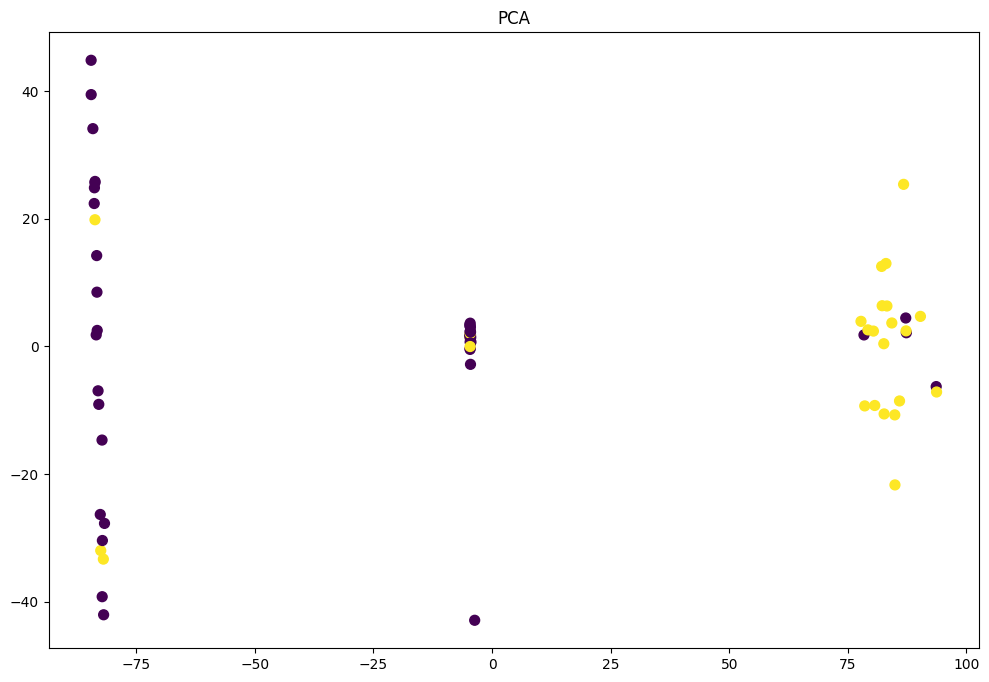

In [63]:
# Visualizing using PCA
pca = decomposition.PCA(n_components=4)
res = pca.fit_transform(X)
plt.figure(figsize=(12,8))
plt.scatter(res[:,0], res[:,1], c=y.values, s=50, cmap='viridis')
plt.title('PCA')

In [45]:
for i, component in enumerate(pca.components_):
    print(
        "{} component: {}% of initial variance".format(
            i + 1, round(100 * pca.explained_variance_ratio_[i], 2)
        )
    )

1 component: 84.64% of initial variance
2 component: 5.86% of initial variance


In [67]:
df_nmc

,"Тип операции (1 - ПРЖ, 2 - ГШ, 3 - ВЖБ, 4 - MGB-OAGB)",Возраст на момент операции,"НМЦ до 0 - нет, 1 - есть, 4 - менопауза, 5 - коки (без деления по структуре)","НМЦ после 0 - нет, 1 - есть, 4 - менопауза, 5 - коки (без деления по структуре)","НМЦ ДО 0 - норма, 1 - аменорея, 2 - олигоменорея, 3 - амк, 4 - менопауза, 5 - коки",Беременности,"Количество беременностей, закончившихся родами до БО",Прерывание беременности по тем или иным причинам,"Курение 0 - нет, 1 - да","Наследственность по ранней менопаузе (до 45 лет) 0 - нет, 1 - да",...,"Глик гем, % (<6) До БО","Глюкоза, ммоль/л (N до 6,1; МС>5,6; НТГ 6,1-7,0; СД >7,0) До БО","Индекс HOMA-IR (<2,7) (инсулин х глюкоза / 22,5) До БО","ХС общий, ммоль/л (N 3,1-5,2 ммоль/л) До БО","АМГ, нг/мл (0,5-19,6 нг/мл) До БО","ЛГ (Фолликулиновая фаза: 2.1 - 10.9 МЕ/л, Овуляторный пик: 19.2 - 103.0, Лютеиновая фаза: 1.2 - 2.9) До БО","ФСГ (Фолликулиновая фаза : 3.9 - 18.8, Овуляторный пик : 4.5 - 22.5, Лютеиновая фаза : 1.8 - 5.1) До БО","ЛГ/ФСГ (0,75-0,95) До БО",число фолликулов пр яиник До БО,число фолликуов левый яиник До БО
0,1.0,38.0,0.0,1.0,0.000000,0.674419,1.000000,0.297297,0.512821,0.605263,...,5.500000,6.100000,2.440000,6.030000,2.409787,6.400000,7.700000,0.830000,6.289474,6.052632
1,1.0,30.0,0.0,0.0,0.000000,0.674419,0.477273,0.297297,0.512821,0.605263,...,5.584483,5.000000,8.913087,5.700000,2.409787,2.500000,5.100000,0.490000,6.289474,6.052632
2,1.0,42.0,1.0,0.0,1.000000,0.674419,1.000000,0.297297,0.512821,0.605263,...,6.100000,6.100000,6.154222,3.200000,2.409787,2.300000,5.900000,0.390000,6.289474,6.052632
3,1.0,40.0,1.0,0.0,3.000000,0.674419,0.477273,0.297297,0.512821,0.605263,...,5.500000,5.440000,4.900000,5.900000,2.409787,9.000000,3.800000,2.370000,6.289474,6.052632
4,1.0,31.0,0.0,1.0,0.000000,0.674419,0.477273,0.297297,0.512821,0.605263,...,5.300000,5.760000,11.200000,4.000000,2.409787,4.700000,6.200000,0.760000,6.289474,6.052632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,2.0,34.0,1.0,0.0,1.041667,0.674419,0.477273,0.297297,0.512821,0.605263,...,5.584483,5.738154,10.900000,5.534262,1.300000,5.829778,7.288889,0.832144,6.289474,6.052632
67,1.0,40.0,1.0,0.0,3.000000,2.000000,0.477273,0.297297,0.512821,0.605263,...,5.500000,6.030000,8.913087,5.450000,2.409787,5.829778,7.288889,0.832144,6.289474,6.052632
68,1.0,35.0,1.0,0.0,1.000000,3.000000,2.000000,1.000000,0.512821,0.605263,...,5.500000,5.620000,8.913087,5.300000,2.409787,5.829778,7.288889,0.832144,6.289474,6.052632
70,1.0,33.0,1.0,0.0,2.000000,0.000000,0.000000,0.000000,0.512821,0.605263,...,5.584483,5.410000,6.347733,5.100000,2.680000,1.740000,4.600000,0.369565,6.289474,6.052632


Тип операции (1 - ПРЖ, 2 - ГШ, 3 - ВЖБ, 4 - MGB-OAGB)  Возраст на момент операции 


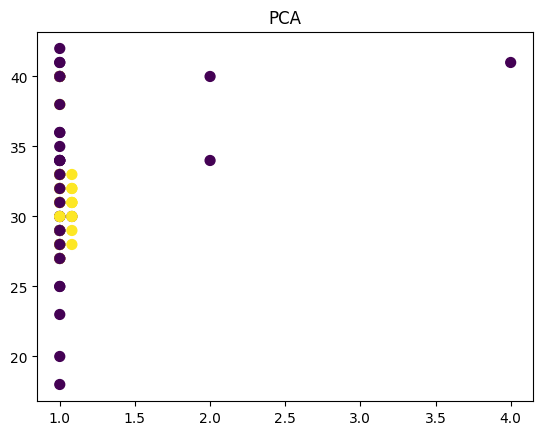

Тип операции (1 - ПРЖ, 2 - ГШ, 3 - ВЖБ, 4 - MGB-OAGB)  НМЦ до 0 - нет, 1 - есть, 4 - менопауза, 5 - коки (без деления по структуре) 


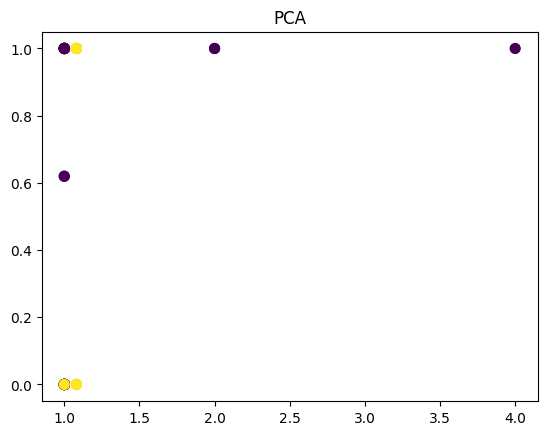

Тип операции (1 - ПРЖ, 2 - ГШ, 3 - ВЖБ, 4 - MGB-OAGB)  НМЦ после 0 - нет, 1 - есть, 4 - менопауза, 5 - коки (без деления по структуре) 


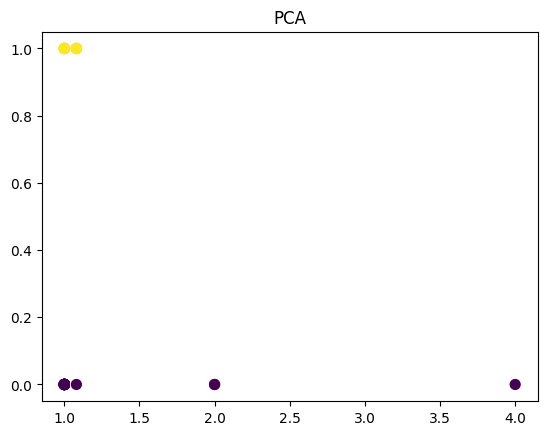

Тип операции (1 - ПРЖ, 2 - ГШ, 3 - ВЖБ, 4 - MGB-OAGB)  НМЦ ДО  0 - норма, 1 - аменорея, 2 - олигоменорея, 3 - амк, 4 - менопауза, 5 - коки 


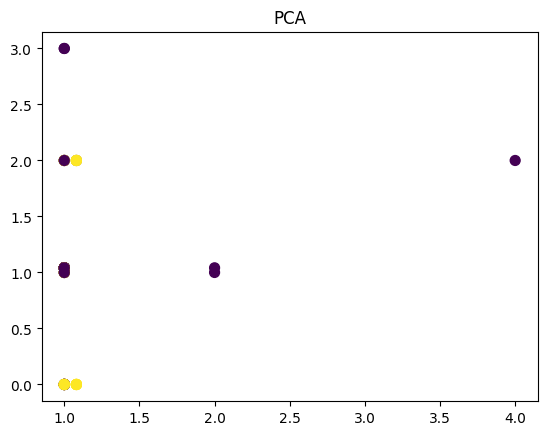

Тип операции (1 - ПРЖ, 2 - ГШ, 3 - ВЖБ, 4 - MGB-OAGB)  Беременности 


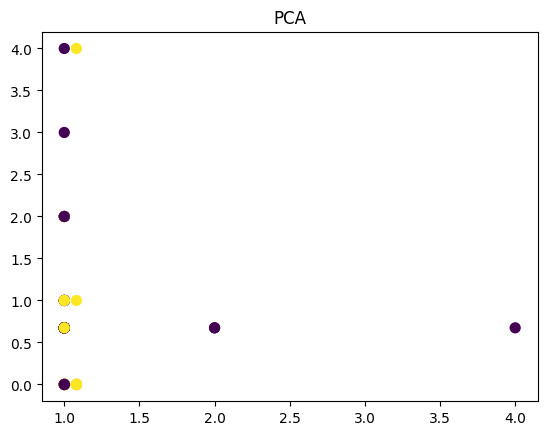

Тип операции (1 - ПРЖ, 2 - ГШ, 3 - ВЖБ, 4 - MGB-OAGB)  Количество беременностей, закончившихся родами до БО 


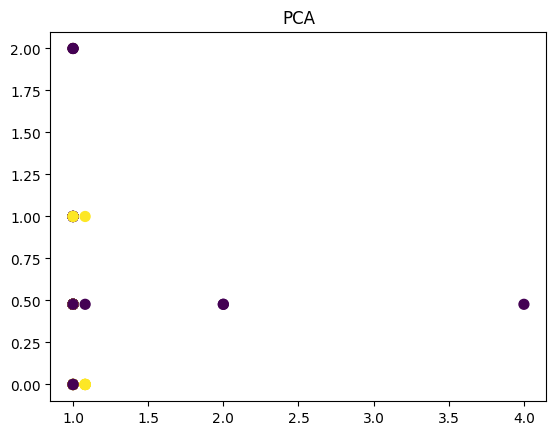

Тип операции (1 - ПРЖ, 2 - ГШ, 3 - ВЖБ, 4 - MGB-OAGB)  Прерывание беременности по тем или иным причинам 


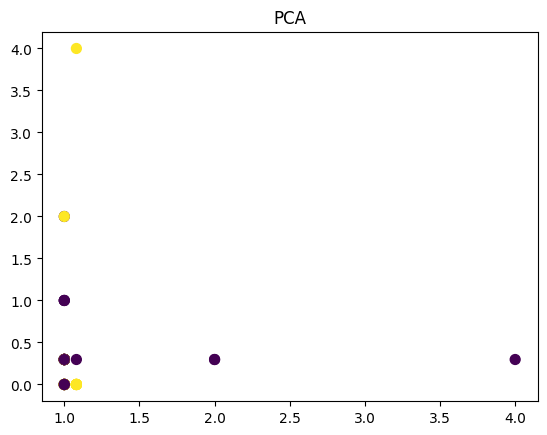

Тип операции (1 - ПРЖ, 2 - ГШ, 3 - ВЖБ, 4 - MGB-OAGB)  Курение 0 - нет, 1 - да 


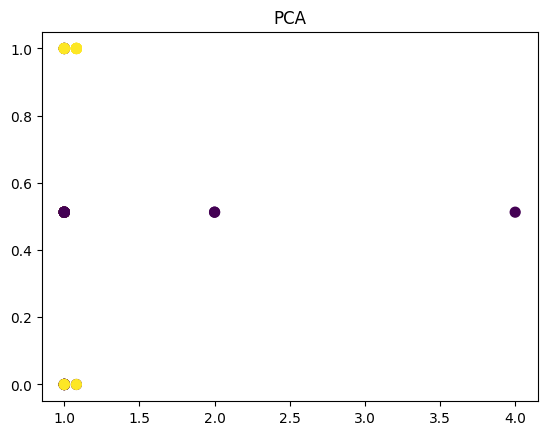

Тип операции (1 - ПРЖ, 2 - ГШ, 3 - ВЖБ, 4 - MGB-OAGB)  Наследственность по ранней менопаузе (до 45 лет) 0 - нет, 1 - да 


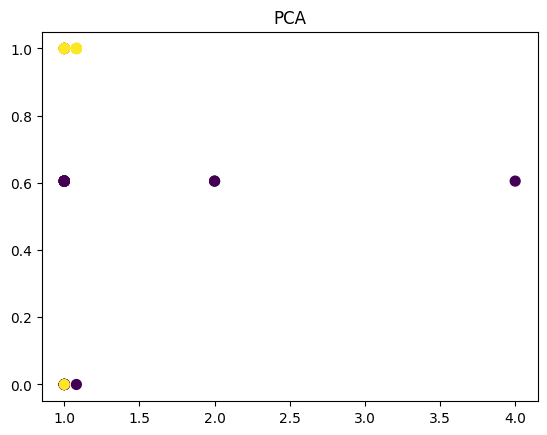

Тип операции (1 - ПРЖ, 2 - ГШ, 3 - ВЖБ, 4 - MGB-OAGB)  Сколько раз худела >10% (экстремальное похудение) 


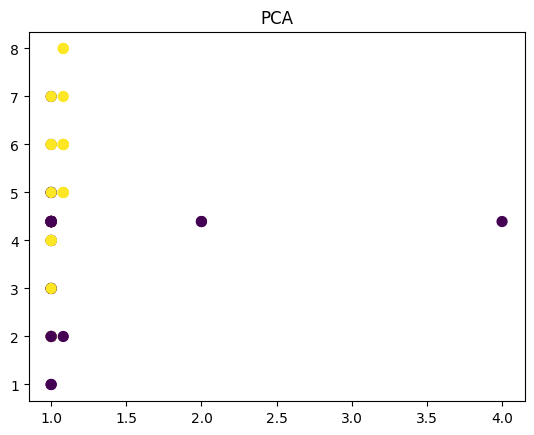

Тип операции (1 - ПРЖ, 2 - ГШ, 3 - ВЖБ, 4 - MGB-OAGB)  Длительность ожирения до операции 


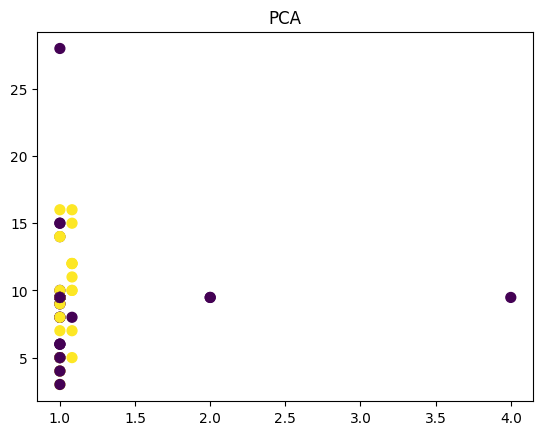

Тип операции (1 - ПРЖ, 2 - ГШ, 3 - ВЖБ, 4 - MGB-OAGB)  Были ли операции на яичниках 0 нет 1 да 


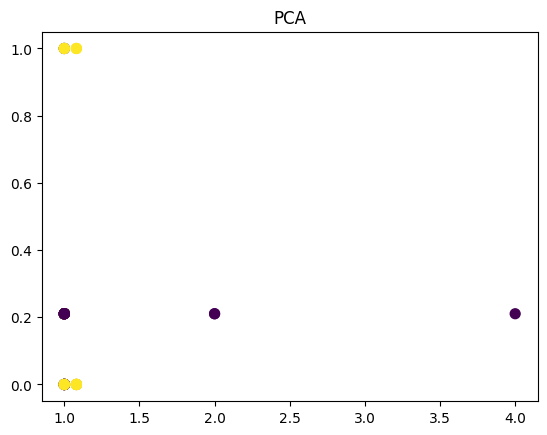

Тип операции (1 - ПРЖ, 2 - ГШ, 3 - ВЖБ, 4 - MGB-OAGB)  Рост, м 


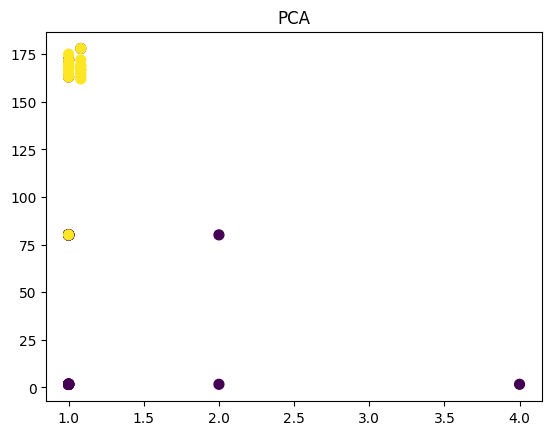

Тип операции (1 - ПРЖ, 2 - ГШ, 3 - ВЖБ, 4 - MGB-OAGB)  Вес на момент операции 


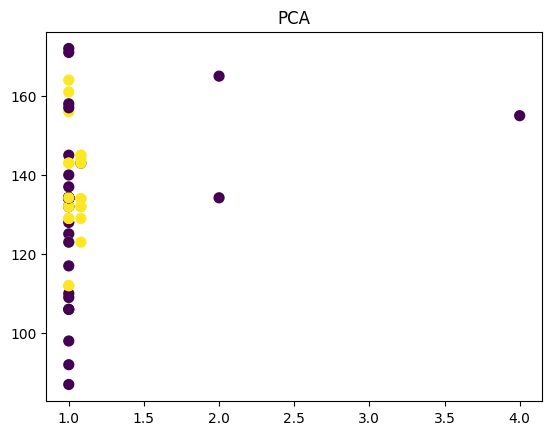

Тип операции (1 - ПРЖ, 2 - ГШ, 3 - ВЖБ, 4 - MGB-OAGB)  ИМТ на момент операции 


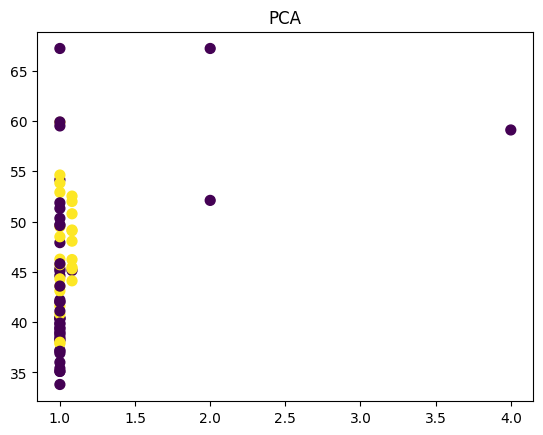

Тип операции (1 - ПРЖ, 2 - ГШ, 3 - ВЖБ, 4 - MGB-OAGB)  Глик гем, % (<6) До БО


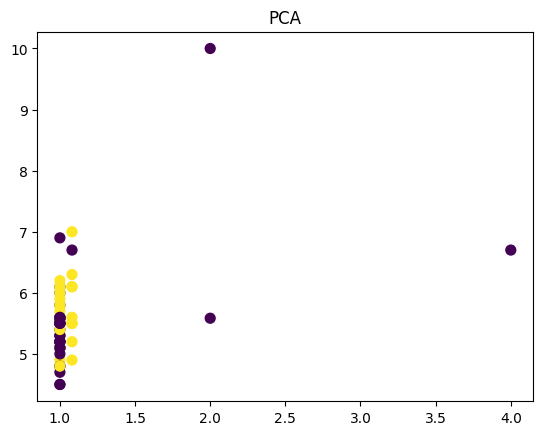

Тип операции (1 - ПРЖ, 2 - ГШ, 3 - ВЖБ, 4 - MGB-OAGB)  Глюкоза, ммоль/л (N до 6,1; МС>5,6; НТГ 6,1-7,0; СД >7,0) До БО


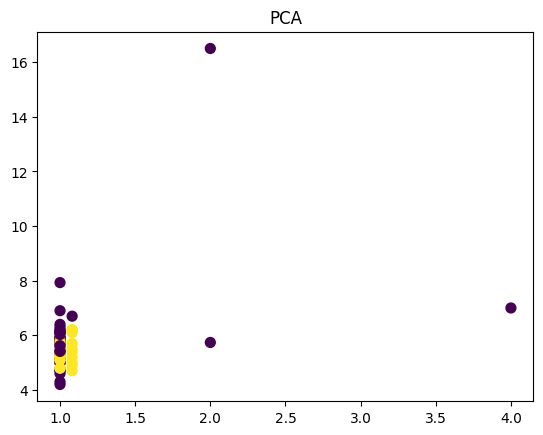

Тип операции (1 - ПРЖ, 2 - ГШ, 3 - ВЖБ, 4 - MGB-OAGB)  Индекс HOMA-IR (<2,7) (инсулин х глюкоза / 22,5) До БО


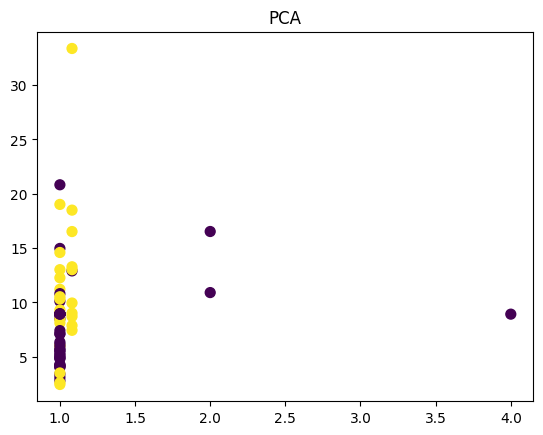

Тип операции (1 - ПРЖ, 2 - ГШ, 3 - ВЖБ, 4 - MGB-OAGB)  ХС общий, ммоль/л (N 3,1-5,2 ммоль/л) До БО


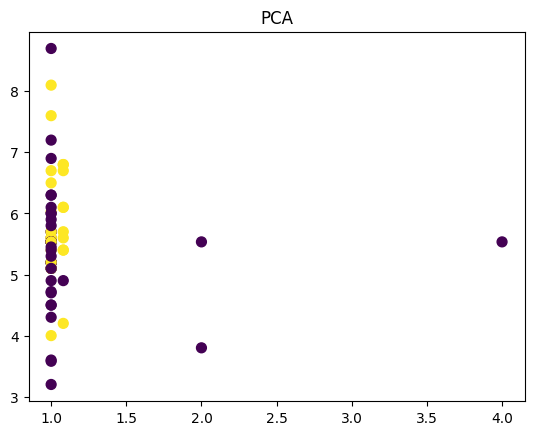

Тип операции (1 - ПРЖ, 2 - ГШ, 3 - ВЖБ, 4 - MGB-OAGB)  АМГ, нг/мл (0,5-19,6 нг/мл) До БО


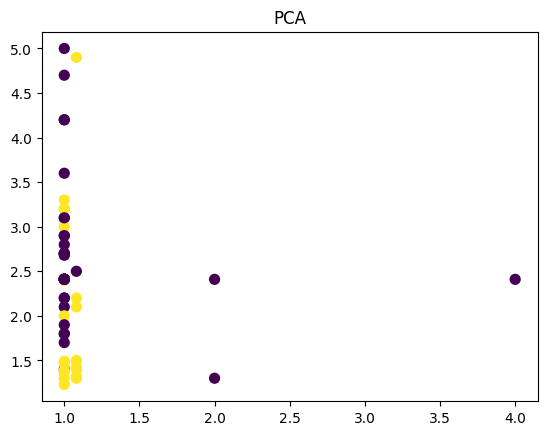

Тип операции (1 - ПРЖ, 2 - ГШ, 3 - ВЖБ, 4 - MGB-OAGB)  ЛГ (Фолликулиновая фаза: 2.1 - 10.9 МЕ/л, Овуляторный пик: 19.2 - 103.0, Лютеиновая фаза: 1.2 - 2.9) До БО


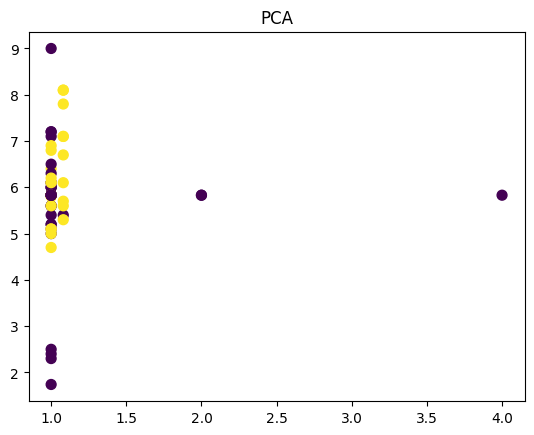

Тип операции (1 - ПРЖ, 2 - ГШ, 3 - ВЖБ, 4 - MGB-OAGB)  ФСГ (Фолликулиновая фаза : 3.9 - 18.8, Овуляторный пик : 4.5 - 22.5, Лютеиновая фаза : 1.8 - 5.1) До БО


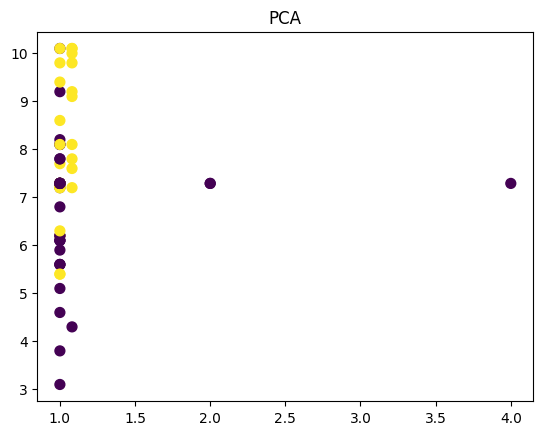

Тип операции (1 - ПРЖ, 2 - ГШ, 3 - ВЖБ, 4 - MGB-OAGB)  ЛГ/ФСГ (0,75-0,95) До БО


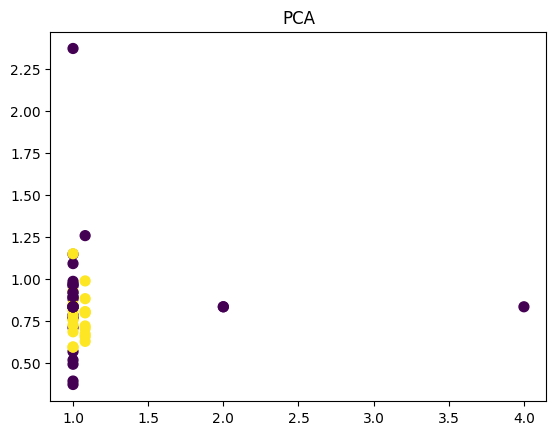

Тип операции (1 - ПРЖ, 2 - ГШ, 3 - ВЖБ, 4 - MGB-OAGB)  число фолликулов пр яиник До БО


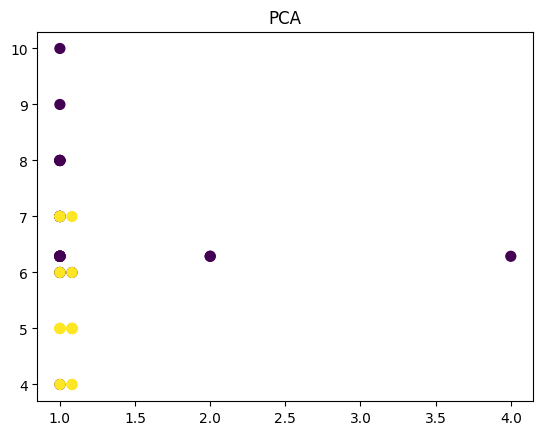

Тип операции (1 - ПРЖ, 2 - ГШ, 3 - ВЖБ, 4 - MGB-OAGB)  число фолликуов левый яиник До БО


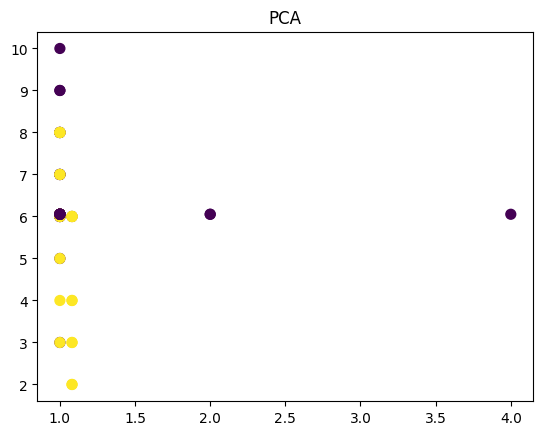

IndexError: index 26 is out of bounds for axis 0 with size 26

In [79]:
for i in range(len(df_nmc)):
    for j in range(len(df_nmc)):
        if i != j:
            print(df_nmc.columns[i], df_nmc.columns[j])
            plt.scatter(list(df_nmc.iloc[:, i]), list(df_nmc.iloc[:, j]), c=y.values, s=50, cmap='viridis')
            plt.title('PCA')
            plt.show()